## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing
import sklearn.metrics
%matplotlib inline

## Reading Data

In [3]:
X_train = pd.read_csv('data/weather_data_train.csv', index_col='datetime',sep=';',decimal=',',infer_datetime_format = True)
X_train_labels = pd.read_csv('data/weather_data_train_labels.csv',index_col='datetime',sep=';',decimal=',',infer_datetime_format='True')
X_test = pd.read_csv('data/weather_data_test.csv', index_col='datetime',sep=';',decimal=',',infer_datetime_format = True)
X_test_labels = pd.read_csv('data/weather_data_test_labels.csv', index_col='datetime',sep=';',decimal=',',infer_datetime_format = True)
X_train
X_train_labels

,OBSERVED,U_mu
datetime,,
2006-09-20,0,88.625
2006-09-21,1,82.000
2006-09-22,1,86.000
2006-09-23,1,91.000
2006-09-24,1,89.000
...,...,...
2015-08-29,1,69.875
2015-08-30,0,82.625
2015-08-31,1,83.750


## Exploratory Data Analysis

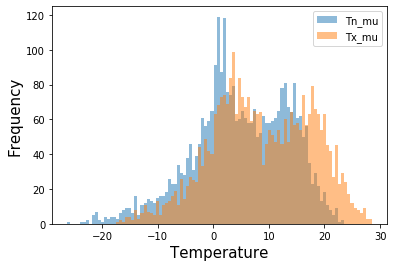

In [8]:
#2.1 Histograms
df = X_train
df[['Tn_mu','Tx_mu']].plot.hist(bins=100,alpha=0.5)
plt.xlabel('Temperature',fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.savefig('images/Histogram.png')

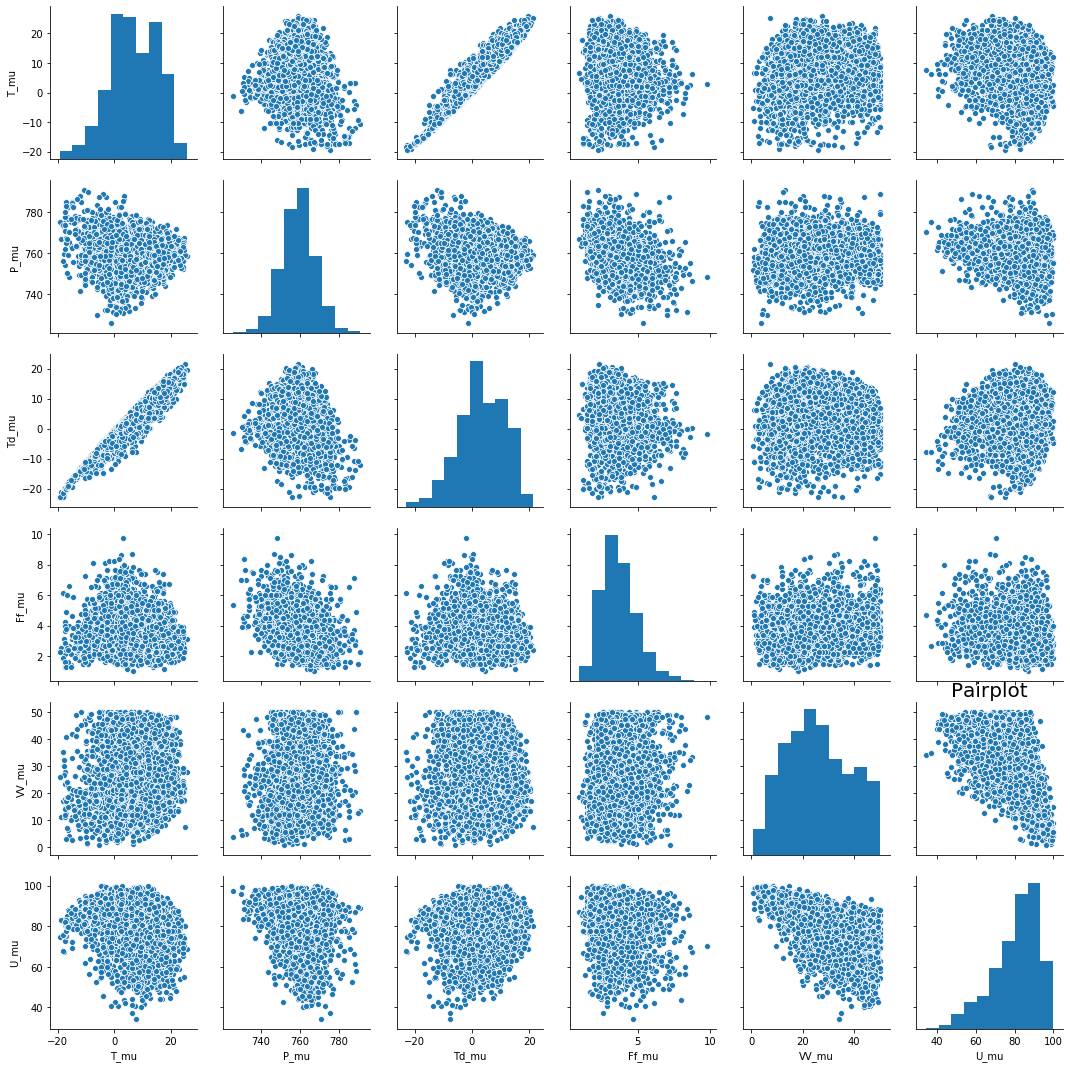

In [9]:
#2.2 Pairplot
df = X_train
df['U_mu'] = X_train_labels['U_mu']
sns.pairplot(df[['T_mu','P_mu','Td_mu','Ff_mu','VV_mu','U_mu']])
plt.title('Pairplot',fontsize=20)
plt.savefig('images/Multi.png')

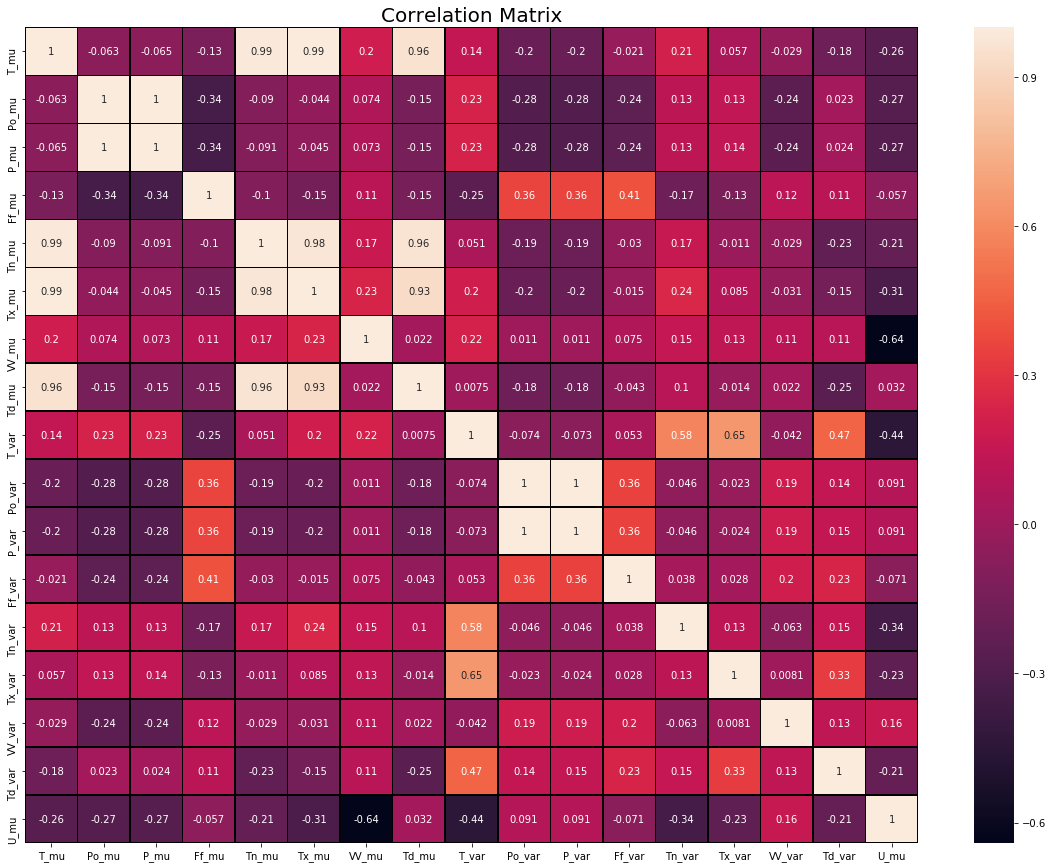

In [10]:
#2.3 Correlation Matrix
df = X_train
labels_df = X_train_labels
df['U_mu']= labels_df['U_mu']
df = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
plt.title('Correlation Matrix',fontsize = 20)
sns.heatmap(df,annot=True,ax=ax,linewidths=0.5,linecolor='black')
plt.savefig('images/Correlation_matrix.png')

In [11]:
#Run previous block first
print(df)

            T_mu     Po_mu      P_mu     Ff_mu     Tn_mu     Tx_mu     VV_mu  \
T_mu    1.000000 -0.063475 -0.064765 -0.129089  0.992020  0.993854  0.197904   
Po_mu  -0.063475  1.000000  0.999989 -0.335656 -0.089972 -0.044090  0.073503   
P_mu   -0.064765  0.999989  1.000000 -0.335417 -0.091260 -0.045372  0.073194   
Ff_mu  -0.129089 -0.335656 -0.335417  1.000000 -0.101940 -0.149504  0.109370   
Tn_mu   0.992020 -0.089972 -0.091260 -0.101940  1.000000  0.979744  0.167064   
Tx_mu   0.993854 -0.044090 -0.045372 -0.149504  0.979744  1.000000  0.232505   
VV_mu   0.197904  0.073503  0.073194  0.109370  0.167064  0.232505  1.000000   
Td_mu   0.955727 -0.146007 -0.147263 -0.146730  0.961942  0.934206  0.021703   
T_var   0.144131  0.225118  0.225030 -0.246450  0.051036  0.202114  0.221391   
Po_var -0.195955 -0.283857 -0.283367  0.361483 -0.189527 -0.197900  0.011147   
P_var  -0.196021 -0.283139 -0.282725  0.361153 -0.189645 -0.197961  0.011387   
Ff_var -0.020912 -0.240412 -0.240176  0.

# Principal Component Analysis (PCA)

1   25.853373406341497
2   44.90656169578994
3   60.574904373455496
4   68.68165822781594
5   75.75263408682942
6   81.34884716060452
7   86.43336910020608
8   91.25234670653505
9   94.5999594626274
10   97.4147431839531
11   98.9881790807807
12   99.93040352091718
13   99.97254138955068
14   99.99436126075256
15   99.99757021775706
16   99.99996076527033


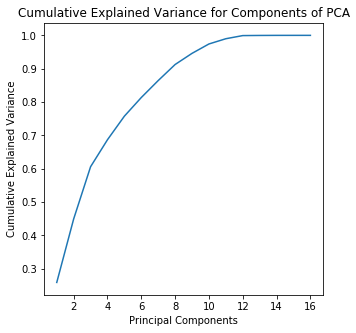

In [12]:
#2.4 PCA
df = X_train
df_labels = X_train_labels['OBSERVED']
df_scaled = StandardScaler().fit_transform(df)
pca = PCA(n_components = 16)
df_pca = pca.fit_transform(df_scaled)
final_df = pd.DataFrame(df_pca)
final_df['OBSERVED'] = X_train_labels['OBSERVED']
pca.explained_variance_ratio_


#run previous cell first 
#Visualise PCA through cumulative experienced variance
fig = plt.figure(figsize=(5,5))


plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Components of PCA')

x = range(1,17)
y= pca.explained_variance_ratio_
sum = 0 
for i in range(y.size) :
    sum += y[i]
    y[i] = sum
    print(i+1 , " " ,y[i]*100)
plt.plot(x,y)
plt.savefig('Cumulative_Explained_Variance.png')



## Linear Regression

In [13]:
#3 Regression
# y = U_mu and x = W_mu
df = X_train
df['U_mu'] = X_train_labels['U_mu']
X = df['VV_mu'].values
Y = df['U_mu'].values


X_mean = 0
for number in X:
    X_mean += number
X_mean /= X.size

Y_mean = 0
for number in Y:
    Y_mean += number
Y_mean /= Y.size

sigma_xy = 0 
sigma_xx = 0 
for number in range(X.size) :
    sigma_xy += ((X[number]-X_mean)*(Y[number]-Y_mean))
    sigma_xx += (X[number]-X_mean)**2
m = sigma_xy/sigma_xx
c = Y_mean - m*X_mean
m,c

(-0.6234713881153786, 96.9942690727485)

In [15]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train,X_train_labels['U_mu'])

prediction = model.predict(X_test)
predicted_df = pd.DataFrame(prediction)
predicted_df
model.coef_,model.intercept_
plt.figure(figsize=(15,10))
plt.plot(prediction,color='#bc5090', label='Predicted Values')
plt.ylabel('Relative Humidity',fontsize = 20)
plt.xlabel('Time',fontsize = 20)
plt.title('Regression Model',fontsize=40)
plt.scatter(range(prediction.size),X_test_labels['U_mu'].values,color=[0,0,0],label = 'Actual Values')#003f5c'
plt.savefig('images/Regression_Model.png')
plt.show()
sklearn.metrics.mean_squared_error(prediction,X_test_labels['U_mu']),model.coef_,model.intercept_
#Norm = preprocessing.normalize(X_train)

#Norm_test = preprocessing.normalize(X_test)

#R = linear_model.LinearRegression()
#R.fit(Norm, X_train_labels['U_mu'])
#print(R.coef_)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 17 is different from 16)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X = X_train
X_t = X_test
y_train = X_train_labels['OBSERVED']
y_test = X_test_labels['OBSERVED']
#print(X.shape)
#print(X_t.shape)
#print(X.head(5))

def knn_optimize(self, show_plot=True):
    """
    Finds the optimal minimum number of neighbors to use for the KNN classifier.
    :param show_plot: bool, when True shows the plot of number of neighbors vs error
            Default: False
    :return: the number of neighbors (int)
    """
   
    
    error = []

    
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X, y_train)
        pred_i = knn.predict(X_t)
        error.append(np.mean(pred_i != y_test))

    m = min(error)
    min_ind = error.index(m)

    if show_plot:
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
                 markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value')
        plt.xlabel('K Value')
        plt.ylabel('Mean Error')
        plt.savefig('Error Rate in K.png')
        plt.show()
        
        

    return min_ind + 1

min_ind = knn_optimize(100, show_plot=True)
print("The method 'knn_optimize' found that " + "the mean error reaches the minimum when the number of neighbors K is", min_ind)
#knn_optimize(100)
knn = KNeighborsClassifier(n_neighbors= min_ind, metric ='euclidean')
knn.fit(X, y_train)
y_pred = knn.predict(X_t)
print(metrics.confusion_matrix(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,linewidth = 0.5)
plt.title('Confusion Matrix')
plt.savefig('KnnConfusionMatrix.png')

temp_df = metrics.confusion_matrix(y_test, y_pred)
temp_df = pd.DataFrame(temp_df)
#sns.heatmap(temp_df,annot=True,linewidths=0.5,linecolor='black')

#pca2 = PCA(n_components = 2)
#pca2.fit(X_t)
#principalcomponents2 = pca2.fit_transform(X_t)
#pca_df2 = pd.DataFrame(data = principalcomponents2, columns = ['principal component 1', 'principal component 2'])
#knn.fit(pca_df2,y_train)
#sns.heatmap(metrics.confusion_matrix(y_test,y2_pred),annot=True,linewidth=0.5)
    
#LR = LogisticRegression()
#LR.fit(X, y_train)
#prediction = LR.predict(X_t)
#print(prediction)

#cm = metrics.confusion_matrix(y_test, prediction)
#print(cm)

ValueError: query data dimension must match training data dimension

In [ ]:
pca2 = PCA(n_components = 2)
pca2.fit(X_t)
principalcomponents2 = pca2.fit_transform(X_t)
pca_df2 = pd.DataFrame(data = principalcomponents2, columns = ['principal component 1', 'principal component 2'])
knn.fit(pca_df2,y_train)
sns.heatmap(metrics.confusion_matrix(y_test,y2_pred),annot=True,linewidth=0.5)

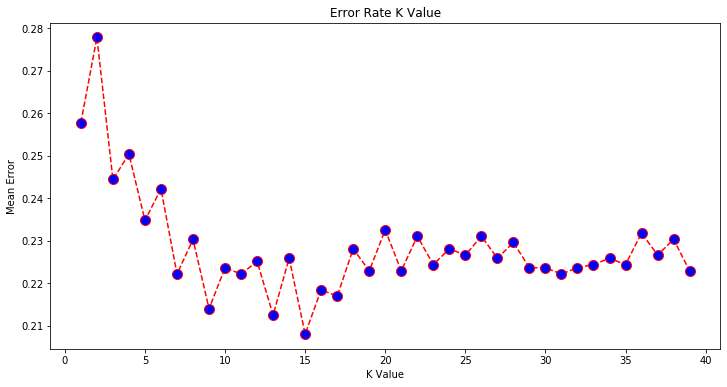

(array([0, 0, 0, ..., 0, 0, 0]), datetime
 2015-09-03    0
 2015-09-04    1
 2015-09-05    0
 2015-09-06    0
 2015-09-07    0
              ..
 2019-05-17    1
 2019-05-18    1
 2019-05-19    1
 2019-05-20    1
 2019-05-21    0
 Name: OBSERVED, Length: 1346, dtype: int64, 15)

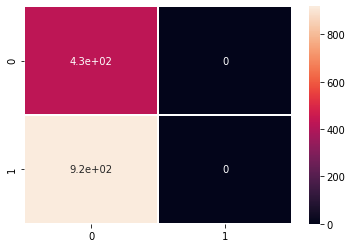

In [113]:
X = X_train
X_t = X_test
y_train = X_train_labels['OBSERVED']
y_test = X_test_labels['OBSERVED']

df_labels = X_train_labels['OBSERVED']
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
final_df = pd.DataFrame(df_pca)

min_ind = knn_optimize(100, show_plot=True)
knn = KNeighborsClassifier(n_neighbors= min_ind, metric ='euclidean')
knn.fit(final_df, y_train)
y_pred = knn.predict(X_t)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,linewidth = 0.5)
y_pred,y_test,min_ind